In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('appl_stock.csv')

In [3]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
df = df.reindex(index=df.index[::-1])
df = df.reset_index()
df

,index,Date,Close/Last,Volume,Open,High,Low
0,2517,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35
1,2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2,2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
3,2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
4,2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
...,...,...,...,...,...,...,...
2513,4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
2514,3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
2515,2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
2516,1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96


In [6]:
df = df.drop('index', 1)

In [7]:
df.columns = ['date', 'close', 'volume', 'open', 'high','low']

In [8]:
j=0
for i in df['close']:
    df['close'][j] = i[2:]
    j+=1
df['close']

0       29.8557
1       29.8357
2       29.9043
3       30.1014
4       31.2786
         ...   
2513     298.18
2514     288.08
2515     292.65
2516     273.52
2517     273.36
Name: close, Length: 2518, dtype: object

In [9]:
df['close'] = pd.to_numeric(df['close'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2518 non-null   object 
 1   close   2518 non-null   float64
 2   volume  2518 non-null   int64  
 3   open    2518 non-null   object 
 4   high    2518 non-null   object 
 5   low     2518 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 118.2+ KB


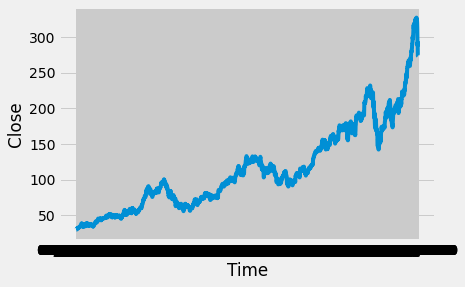

In [10]:
plt.plot(df['date'], df['close'])
plt.ylabel('Close')
plt.xlabel('Time')
plt.show()

In [11]:
close = df['close']

In [12]:
close

0        29.8557
1        29.8357
2        29.9043
3        30.1014
4        31.2786
          ...   
2513    298.1800
2514    288.0800
2515    292.6500
2516    273.5200
2517    273.3600
Name: close, Length: 2518, dtype: float64

In [13]:
close = np.array(close)
close

array([ 29.8557,  29.8357,  29.9043, ..., 292.65  , 273.52  , 273.36  ])

In [14]:
close = close.reshape(-1,1)
close

array([[ 29.8557],
       [ 29.8357],
       [ 29.9043],
       ...,
       [292.65  ],
       [273.52  ],
       [273.36  ]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(close)

In [16]:
close

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [17]:
train_s=int(len(close)*0.70)
test_s=len(close)-train_s
train = close[0:train_s,:]
test = close[train_s:len(close),:1]

In [18]:
train.shape

(1762, 1)

In [19]:
def create_dataset(data,step):
    X=[]
    y=[]
    for i in range(len(data)-step-1):
        a = data[i:(i+step)]
        X.append(a)
        y.append(data[i+step])
    return np.array(X),np.array(y)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [21]:
X_train.shape

(1661, 100, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout

In [23]:
model=Sequential()
model.add(GRU(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.3))
model.add(GRU(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 50)           7950      
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 50)           15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [25]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 20s 76ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 2/100
26/26 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 4.5210e-04
Epoch 3/100
26/26 [==============================] - 1s 28ms/step - loss: 8.1403e-04 - val_loss: 0.0010
Epoch 4/100
26/26 [==============================] - 1s 28ms/step - loss: 6.4380e-04 - val_loss: 5.3274e-04
Epoch 5/100
26/26 [==============================] - 1s 27ms/step - loss: 6.4628e-04 - val_loss: 8.8597e-04
Epoch 6/100
26/26 [==============================] - 1s 26ms/step - loss: 5.9064e-04 - val_loss: 5.0866e-04
Epoch 7/100
26/26 [==============================] - 1s 26ms/step - loss: 6.0303e-04 - val_loss: 9.4092e-04
Epoch 8/100
26/26 [==============================] - 1s 26ms/step - loss: 5.6152e-04 - val_loss: 5.4793e-04
Epoch 9/100
26/26 [==============================] - 1s 27ms/step - loss: 5.1293e-04 - val_loss: 4.3148e-04
Epoch 10/100
26/26 [=======================

26/26 [==============================] - 1s 26ms/step - loss: 1.8561e-04 - val_loss: 6.6627e-04
Epoch 77/100
26/26 [==============================] - 1s 26ms/step - loss: 1.5579e-04 - val_loss: 2.5715e-04
Epoch 78/100
26/26 [==============================] - 1s 26ms/step - loss: 1.7898e-04 - val_loss: 2.6798e-04
Epoch 79/100
26/26 [==============================] - 1s 25ms/step - loss: 1.6263e-04 - val_loss: 8.0752e-04
Epoch 80/100
26/26 [==============================] - 1s 26ms/step - loss: 1.5646e-04 - val_loss: 6.3570e-04
Epoch 81/100
26/26 [==============================] - 1s 26ms/step - loss: 1.7047e-04 - val_loss: 3.0609e-04
Epoch 82/100
26/26 [==============================] - 1s 29ms/step - loss: 1.6302e-04 - val_loss: 3.8400e-04
Epoch 83/100
26/26 [==============================] - 1s 30ms/step - loss: 1.5699e-04 - val_loss: 4.1502e-04
Epoch 84/100
26/26 [==============================] - 1s 35ms/step - loss: 1.7528e-04 - val_loss: 4.2771e-04
Epoch 85/100
26/26 [============

In [26]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


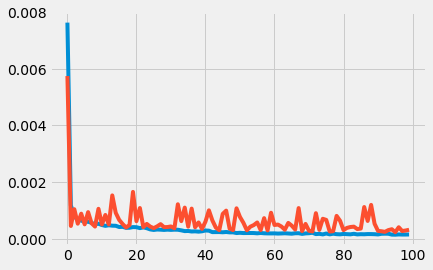

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

0.01780659560845535

In [30]:
model.save('saved_model/grumodeldrop')

INFO:tensorflow:Assets written to: saved_model/grumodeldrop\assets


INFO:tensorflow:Assets written to: saved_model/grumodeldrop\assets


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

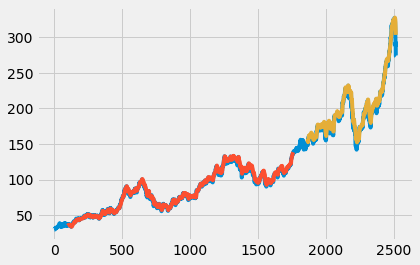

In [32]:
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
X_plot_full = close[-200:]

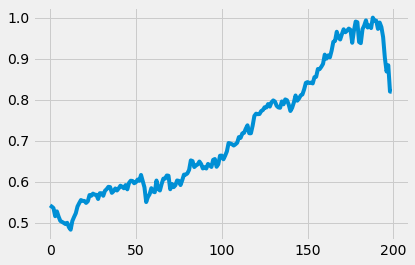

In [34]:
plt.plot(X_plot_full)
plt.show()

In [35]:
X_plot_full.shape

(200, 1)

In [36]:
x_input = X_plot_full[-100:].reshape((1,100))
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.6632413507606663,
 0.6542960940502945,
 0.6631404644067899,
 0.6734308725021799,
 0.6940116886929601,
 0.6928683100156945,
 0.6910187268612943,
 0.6878239923218759,
 0.6908842117227925,
 0.6946842643854693,
 0.7084720660819068,
 0.7066224829275067,
 0.7174509515769041,
 0.7187961029619224,
 0.7288847383495598,
 0.7371910481520478,
 0.7178208682077841,
 0.7177199818539077,
 0.7362158133979095,
 0.7599577353434827,
 0.7656073711605595,
 0.7643631061294176,
 0.7647330227602978,
 0.7720977265932729,
 0.7744853703016804,
 0.7814128999345247,
 0.7806058091035136,
 0.7890466340445037,
 0.7828925664580448,
 0.7933847472611876,
 0.797891004400999,
 0.795167072846337,
 0.784742149612445,
 0.780773953026641,
 0.7800004909802554,
 0.7954361031233406,
 0.7884413159212454,
 0.8003795344632828,
 0.7983954361703809,
 0.7880041417211145,
 0.7721649841625238,
 0.7798659758417537,
 0.7927794291379293,
 0.8100309956507892,
 0.7972856862777408,
 0.8025317766793122,
 0.810232768358542,
 0.812553154497698

In [39]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):  
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.870373]
101
1 day input [0.65429609 0.66314046 0.67343087 0.69401169 0.69286831 0.69101873
 0.68782399 0.69088421 0.69468426 0.70847207 0.70662248 0.71745095
 0.7187961  0.72888474 0.73719105 0.71782087 0.71771998 0.73621581
 0.75995774 0.76560737 0.76436311 0.76473302 0.77209773 0.77448537
 0.7814129  0.78060581 0.78904663 0.78289257 0.79338475 0.797891
 0.79516707 0.78474215 0.78077395 0.78000049 0.7954361  0.78844132
 0.80037953 0.79839544 0.78800414 0.77216498 0.77986598 0.79277943
 0.810031   0.79728569 0.80253178 0.81023277 0.81255315 0.82496218
 0.84080133 0.84265092 0.84039779 0.84133939 0.83938892 0.85472365
 0.85563163 0.87459826 0.87422835 0.8800125  0.88717543 0.90970671
 0.89988711 0.90785713 0.90311547 0.91925729 0.94091423 0.94326824
 0.96556412 0.951171   0.94666475 0.95977997 0.97151642 0.9642526
 0.96805265 0.97319786 0.97010401 0.93862747 0.96801903 0.99038217
 0.98880161 0.94051068 0.93765223 0.97191996 0.98066345 0.99330787
 0.97588816 0.98099974 0.97447575 1.  

11 day output [[0.9276827]]
12 day input [0.71745095 0.7187961  0.72888474 0.73719105 0.71782087 0.71771998
 0.73621581 0.75995774 0.76560737 0.76436311 0.76473302 0.77209773
 0.77448537 0.7814129  0.78060581 0.78904663 0.78289257 0.79338475
 0.797891   0.79516707 0.78474215 0.78077395 0.78000049 0.7954361
 0.78844132 0.80037953 0.79839544 0.78800414 0.77216498 0.77986598
 0.79277943 0.810031   0.79728569 0.80253178 0.81023277 0.81255315
 0.82496218 0.84080133 0.84265092 0.84039779 0.84133939 0.83938892
 0.85472365 0.85563163 0.87459826 0.87422835 0.8800125  0.88717543
 0.90970671 0.89988711 0.90785713 0.90311547 0.91925729 0.94091423
 0.94326824 0.96556412 0.951171   0.94666475 0.95977997 0.97151642
 0.9642526  0.96805265 0.97319786 0.97010401 0.93862747 0.96801903
 0.99038217 0.98880161 0.94051068 0.93765223 0.97191996 0.98066345
 0.99330787 0.97588816 0.98099974 0.97447575 1.         0.99216449
 0.99243352 0.9724244  0.9879609  0.97679614 0.95241527 0.90240927
 0.86844419 0.88381255

19 day output [[0.9634307]]
20 day input [0.76560737 0.76436311 0.76473302 0.77209773 0.77448537 0.7814129
 0.78060581 0.78904663 0.78289257 0.79338475 0.797891   0.79516707
 0.78474215 0.78077395 0.78000049 0.7954361  0.78844132 0.80037953
 0.79839544 0.78800414 0.77216498 0.77986598 0.79277943 0.810031
 0.79728569 0.80253178 0.81023277 0.81255315 0.82496218 0.84080133
 0.84265092 0.84039779 0.84133939 0.83938892 0.85472365 0.85563163
 0.87459826 0.87422835 0.8800125  0.88717543 0.90970671 0.89988711
 0.90785713 0.90311547 0.91925729 0.94091423 0.94326824 0.96556412
 0.951171   0.94666475 0.95977997 0.97151642 0.9642526  0.96805265
 0.97319786 0.97010401 0.93862747 0.96801903 0.99038217 0.98880161
 0.94051068 0.93765223 0.97191996 0.98066345 0.99330787 0.97588816
 0.98099974 0.97447575 1.         0.99216449 0.99243352 0.9724244
 0.9879609  0.97679614 0.95241527 0.90240927 0.86844419 0.88381255
 0.81948068 0.81894262 0.87037301 0.87722141 0.88458687 0.89027119
 0.89526194 0.90002841 0.

27 day output [[0.9976182]]
28 day input [0.78289257 0.79338475 0.797891   0.79516707 0.78474215 0.78077395
 0.78000049 0.7954361  0.78844132 0.80037953 0.79839544 0.78800414
 0.77216498 0.77986598 0.79277943 0.810031   0.79728569 0.80253178
 0.81023277 0.81255315 0.82496218 0.84080133 0.84265092 0.84039779
 0.84133939 0.83938892 0.85472365 0.85563163 0.87459826 0.87422835
 0.8800125  0.88717543 0.90970671 0.89988711 0.90785713 0.90311547
 0.91925729 0.94091423 0.94326824 0.96556412 0.951171   0.94666475
 0.95977997 0.97151642 0.9642526  0.96805265 0.97319786 0.97010401
 0.93862747 0.96801903 0.99038217 0.98880161 0.94051068 0.93765223
 0.97191996 0.98066345 0.99330787 0.97588816 0.98099974 0.97447575
 1.         0.99216449 0.99243352 0.9724244  0.9879609  0.97679614
 0.95241527 0.90240927 0.86844419 0.88381255 0.81948068 0.81894262
 0.87037301 0.87722141 0.88458687 0.89027119 0.89526194 0.90002841
 0.90470666 0.90934271 0.9139542  0.91854733 0.92312366 0.9276827
 0.93222386 0.93674606

In [40]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)

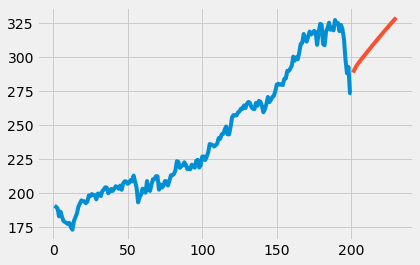

In [41]:
plt.plot(day_new,scaler.inverse_transform(X_plot_full))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

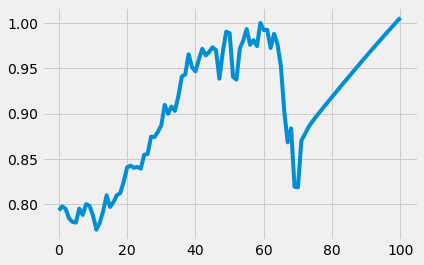

In [42]:
plt.plot(temp_input)